<p><img alt="UDLA logo" height="150px" src="https://www.uao.edu.co/wp-content/uploads/2022/06/Logo-nuevo-acreditación.png"  align="center" hspace="5px" vspace="5px"></p>

#<ins>**Proyecto final Gestión y almacenamiento de datos.**</ins>

*Notebook de limpieza y visualización de datos*

##**Estudiantes:**

*****Natasha Hoyos Código 2241007*****

*****Sergio Márquez Código 2241010*****

*****Carlos Adolfo Restrepo Código 2241006*****


###Tenemos un registro de ventas, de los últimos 8 años, de un almacén de insumos para confección ubicado en Cali, este consta de las siguientes características:

###1. **Descripción:** la cual indica el nombre exacto del producto vendido, esta característica es de tipo caracter.
###2. **Unidad:** Nos indica la unidad de medida del producto vendido, esta característica es de tipo caracter.
###3. **Sector:** Nos indica al grupo o clase que pertenece el producto, esta característica es de tipo caracter.
###4. **Fecha:** Fecha exacta en la que se vendió el item esta característica es de tipo datetime.
###5. **Cantidad vendida:** indica el número de productos vendidos, esta característica es de tipo numérica.
###6. **Valor venta:** indica el valor recibido por la venta del producto, esta característica es de tipo numérica.
###7. **Rentabilidad:** indica el porcentaje de ganancia que dejó la venta del producto, esta característica es de tipo numerica.

# ***Problemática:***

###1.Identificar qué se debe mejorar o cambiar para aumentar rentabilidad.
###2.Identificar algún sector (categoría) que deba mejorar la oferta.
###3.Insight que permitan generar más valor.





##1. Cargue de librerias, BD y exploracion del dataset

In [6]:
#Se importan las librerias
import pandas as pd # para análisis de datos
import numpy as np #Operaciones matemáticas, además trabaja de la mano con matplotlib y seaborn
import matplotlib.pyplot as plt #Para gráficar
import seaborn as sns #Para gráficar


In [ ]:
#Se carga la base de datos
df = pd.read_excel("/content/ventasalmacen.xlsx")

In [ ]:
# Estructura de los datos
df.head()

,Descripción,Unidad,Sector,Fecha,Cantidad Vendida,Valor venta,Rentabilidad
0,Hilaza 1C Blanca 100G,Cono,Hilazas,2016-01-04,4,7200,1.000000
1,Hilaza 1C Color 100G,Cono,Hilazas,2016-01-04,20,34000,0.307692
2,Hilaza 2C Blanca 200G,Cono,Hilazas,2016-01-04,2,5000,0.315789
3,Hilaza 1C Color 200g,Cono,Hilazas,2016-01-04,9,25200,0.120000
4,Hilaza 1C Blanca 500G,Cono,Hilazas,2016-01-04,3,16500,0.375000


In [ ]:
#Tamaño del conjunto de datos
fil,col=df.shape
print(f"El dataset tiene {fil} filas y {col} columnas")

El dataset tiene 159971 filas y 7 columnas


In [ ]:
 # información detallada del conjunto de datos
df.info()

#Aquí vemos que el valor de la venta tiene un tipo de dato incorrecto


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159971 entries, 0 to 159970
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Descripción       159971 non-null  object        
 1   Unidad            159971 non-null  object        
 2   Sector            159971 non-null  object        
 3   Fecha             159971 non-null  datetime64[ns]
 4   Cantidad Vendida  159971 non-null  object        
 5   Valor venta       159970 non-null  object        
 6   Rentabilidad      159954 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.5+ MB


##2. Estadística descriptiva y limpieza de variables numéricas.

*Datos conservados: 99.9%, equivalente a 156.816 registros*

***Rentabilidad:*** Se eliminaron 31 registros negativos por ser incongruentes y otros 26 por ser valores atípicos que no corresponden a la realidad.

***Fechas:*** Se eliminaron 3 registros inconsistentes.

In [ ]:
 # información detallada del conjunto de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159971 entries, 0 to 159970
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Descripción       159971 non-null  object        
 1   Unidad            159971 non-null  object        
 2   Sector            159971 non-null  object        
 3   Fecha             159971 non-null  datetime64[ns]
 4   Cantidad Vendida  159971 non-null  object        
 5   Valor venta       159970 non-null  object        
 6   Rentabilidad      159954 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.5+ MB


Aquí vemos que el valor de la venta y la cantidad vendida tienen un tipo de dato incorrecto, ya que aparecen como caracteres, por lo cual se procede a convertir a numéricos.

In [ ]:
#Se convierten las variables numéricas que estan como object a float
df['Cantidad Vendida'] = pd.to_numeric(df['Cantidad Vendida'], errors='coerce')## habian dos valores con espacios en blanco, con esta funcion se convierten en NA antes de convertirlo a numeric y evitar errores de codigo
df['Valor venta'] = pd.to_numeric(df['Valor venta'], errors='coerce')

In [ ]:
df.columns #para saber los items de las columnas

Index(['Descripción', 'Unidad', 'Sector', 'Fecha', 'Cantidad Vendida',
       'Valor venta', 'Rentabilidad'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159971 entries, 0 to 159970
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Descripción       159971 non-null  object        
 1   Unidad            159971 non-null  object        
 2   Sector            159971 non-null  object        
 3   Fecha             159971 non-null  datetime64[ns]
 4   Cantidad Vendida  159969 non-null  float64       
 5   Valor venta       159959 non-null  float64       
 6   Rentabilidad      159954 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 8.5+ MB


In [ ]:
df.describe() #resumen descriptivo de los datos
##

,Cantidad Vendida,Valor venta,Rentabilidad
count,159969.000000,159959.000000,159954.000000
mean,3.497986,10738.876418,0.563655
std,14.336876,13813.899446,11.263505
min,0.300000,100.000000,-0.883649
25%,1.000000,3400.000000,0.250000
50%,2.000000,6900.000000,0.352201
75%,4.000000,13000.000000,0.666667
max,2700.000000,488700.000000,4499.000000


Datos duplicados vamos a tener por la naturaleza de la base de datos, ya que se pueden haber tenido ventas iguales a lo largo de tantos años, por lo tanto no se eliminan.

In [ ]:
df.isnull().sum() # realiza un conteo de datos nulos


Descripción          0
Unidad               0
Sector               0
Fecha                0
Cantidad Vendida     2
Valor venta         12
Rentabilidad        17
dtype: int64

Hay 17 datos nulos de rentabilidad, 12 de valor venta, y 2 de cantidad vendida, de un total de 159971 dats. Al ser tan pocos datos, se decide eliminarlo.

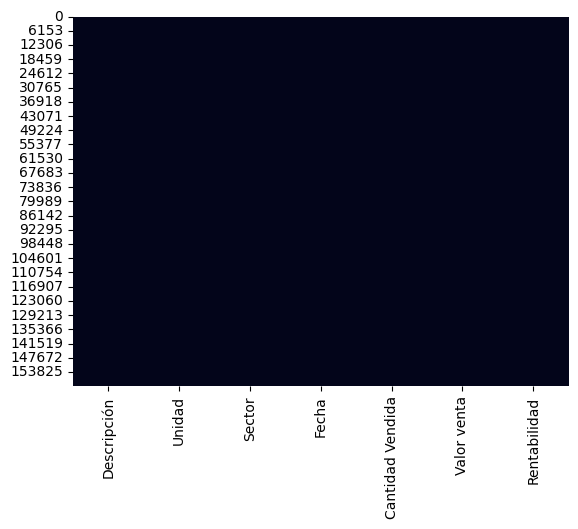

In [ ]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()

#este mapa de calor practicamente muestra que no tenemos datos nulos

Se observa que la base de datos tiene muy pocos datos nulos, lo que facilita la parte de la limpieza en el caso de imputaciones

In [ ]:
#Hacemos copia del dataset
df_limpio = df.copy()

In [ ]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159971 entries, 0 to 159970
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Descripción       159971 non-null  object        
 1   Unidad            159971 non-null  object        
 2   Sector            159971 non-null  object        
 3   Fecha             159971 non-null  datetime64[ns]
 4   Cantidad Vendida  159969 non-null  float64       
 5   Valor venta       159959 non-null  float64       
 6   Rentabilidad      159954 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 8.5+ MB


In [ ]:
#Eliminamos los datos nulos del dataset
df_limpio = df_limpio.dropna()




In [ ]:
#Verificamos el conteo de datos nulos
df_limpio.isnull().sum() # realiza un conteo de datos nulos

Descripción         0
Unidad              0
Sector              0
Fecha               0
Cantidad Vendida    0
Valor venta         0
Rentabilidad        0
dtype: int64

In [ ]:
#Verificamos la información que quedó en el dataframe
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159952 entries, 0 to 159970
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Descripción       159952 non-null  object        
 1   Unidad            159952 non-null  object        
 2   Sector            159952 non-null  object        
 3   Fecha             159952 non-null  datetime64[ns]
 4   Cantidad Vendida  159952 non-null  float64       
 5   Valor venta       159952 non-null  float64       
 6   Rentabilidad      159952 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 9.8+ MB


In [ ]:
df_limpio.describe()

,Cantidad Vendida,Valor venta,Rentabilidad
count,159952.000000,159952.000000,159952.000000
mean,3.497964,10738.704318,0.563660
std,14.337597,13813.962534,11.263575
min,0.300000,100.000000,-0.883649
25%,1.000000,3400.000000,0.250000
50%,2.000000,6900.000000,0.352201
75%,4.000000,13000.000000,0.666667
max,2700.000000,488700.000000,4499.000000


En la tabla descriptiva de las características se observa que en la rentabilidad hay un mínimo negativo, lo cual es incorrecto. Por lo tanto, se procede a eliminarse los datos.

In [ ]:
## la rentabilidad no puede ser negativa
df_limpio[df_limpio["Rentabilidad"] <=0].value_counts().sum()


31

In [ ]:
df_limpio[df_limpio["Rentabilidad"] <=0]['Valor venta'].mean()

7958.064516129032

Hay 31 datos con rentabilidad negativa, de un total de 159954. Es un porcentaje muy bajo del dataset, además tienen un valor de venta muy bajo de tan solo $7958 por lo cual deciden eliminarse ya que no afectaran el análisis de la información.

In [ ]:
df_limpio= df_limpio[df_limpio["Rentabilidad"] >0].dropna()

In [ ]:
df_limpio.describe()

,Cantidad Vendida,Valor venta,Rentabilidad
count,159921.000000,159921.000000,159921.000000
mean,3.492473,10739.243333,0.563849
std,14.278844,13814.539111,11.264658
min,0.300000,100.000000,0.013556
25%,1.000000,3400.000000,0.250000
50%,2.000000,6900.000000,0.352201
75%,4.000000,13000.000000,0.666667
max,2700.000000,488700.000000,4499.000000


La rentabilidad mínima y promedio son coherentes, sin embargo la máxima no es correcta, ya que no hay producto que deje de ganancia de 4500%, vamos a verificar datos atípicos para tomar decisiones

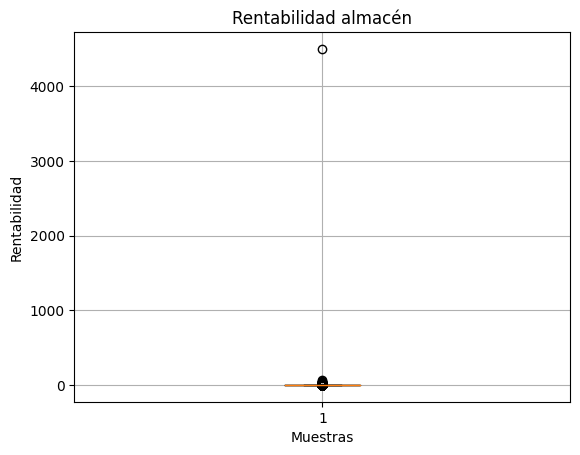

In [ ]:
### se crea una gráfica tipo boxplot del rentabilidad

plt.figure() #Abre una figura en matplotlib
plt.boxplot(df_limpio["Rentabilidad"])
plt.ylabel("Rentabilidad")
plt.xlabel("Muestras")
plt.grid(True)
plt.title("Rentabilidad almacén")
plt.show() #cierra la línea de código de la figura


Aquí podemos ver un dato atípico de casi 5000% de rentabilidad, se elimina.

In [ ]:
df_limpio= df_limpio[df_limpio["Rentabilidad"] <10.0].dropna() #la rentabilidad no está por encima de 1000%

In [ ]:
df_limpio.describe()

,Cantidad Vendida,Valor venta,Rentabilidad
count,159851.000000,159851.000000,159851.000000
mean,3.492851,10740.322757,0.529352
std,14.281884,13784.945621,0.464412
min,0.300000,100.000000,0.013556
25%,1.000000,3400.000000,0.250000
50%,2.000000,6900.000000,0.352201
75%,4.000000,13000.000000,0.666667
max,2700.000000,488700.000000,9.033445


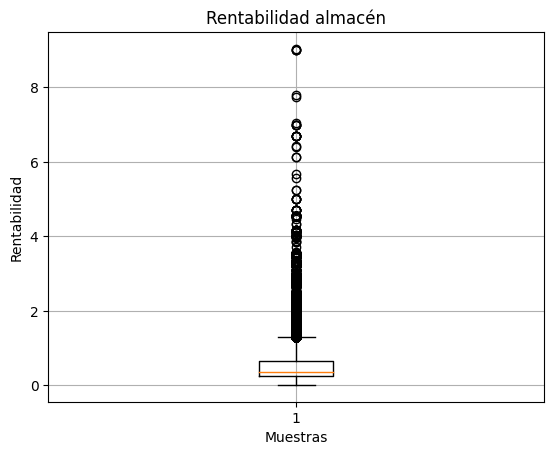

In [ ]:
### se crea una gráfica tipo boxplot del rentabilidad

plt.figure() #Abre una figura en matplotlib
plt.boxplot(df_limpio["Rentabilidad"])
plt.ylabel("Rentabilidad")
plt.xlabel("Muestras")
plt.grid(True)
plt.title("Rentabilidad almacén")
plt.show() #cierra la línea de código de la figura

Ahora comprobamos la veracidad de los datos con rentabilidad > 600%

In [ ]:
datos_atipicos = df_limpio[df_limpio["Rentabilidad"] >6.0]
datos_atipicos

,Descripción,Unidad,Sector,Fecha,Cantidad Vendida,Valor venta,Rentabilidad
14051,Aguja mano Rose paño,paño,Agujas,2017-03-04,1.0,1500.0,6.692308
18045,Aguja mano Rose paño,paño,Agujas,2017-06-03,1.0,1500.0,6.692308
18122,Aguja Singer unidad,Unidad,Agujas,2017-06-06,2.0,1000.0,6.142857
19001,Aguja Singer unidad,Unidad,Agujas,2017-06-27,3.0,1050.0,7.750000
21037,Aguja mano Rose paño,paño,Agujas,2017-08-11,1.0,1500.0,6.692308
21927,Aguja mano Rose paño,paño,Agujas,2017-08-31,1.0,1500.0,6.692308
25987,Aguja mano Rose paño,paño,Agujas,2017-11-23,1.0,1500.0,6.692308
27348,Hilaza 2C Color 500 G,Cono,Hilazas,2018-01-03,8.0,60000.0,9.033445
62041,aguja China singer,Unidad,Cacharro,2019-10-04,2.0,800.0,7.000000
62180,aguja China singer,Unidad,Cacharro,2019-10-07,2.0,800.0,7.000000


In [ ]:
datos_atipicos.value_counts().sum()

22

Consideramos que esos 22 datos son atípicos y representan el 0.013% de los datos, decidimos eliminarlos.

In [ ]:
df_limpio= df_limpio[df_limpio["Rentabilidad"] <6.0].dropna()

Aquí ya vemos la rentabilidad más ajustada a la realidad, luego haremos la revisión por sectores para identificar datos atípicos.



In [ ]:
df_limpio.describe()


,Cantidad Vendida,Valor venta,Rentabilidad
count,159851.000000,159851.000000,159851.000000
mean,3.492851,10740.322757,0.529352
std,14.281884,13784.945621,0.464412
min,0.300000,100.000000,0.013556
25%,1.000000,3400.000000,0.250000
50%,2.000000,6900.000000,0.352201
75%,4.000000,13000.000000,0.666667
max,2700.000000,488700.000000,9.033445


In [ ]:
df_limpio.info() #Verificamos el estado de los datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159851 entries, 0 to 159970
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Descripción       159851 non-null  object        
 1   Sector            159851 non-null  object        
 2   Fecha             159851 non-null  datetime64[ns]
 3   Cantidad Vendida  159851 non-null  float64       
 4   Valor venta       159851 non-null  float64       
 5   Rentabilidad      159851 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 12.6+ MB


La columna "Unidad" hace referencia a la unidad de medida y considerados que en un análisis para mejorar ventas y retabilidad no aportará información, por lo tanto se retira de la base de datos.

In [ ]:
df_limpio.drop(["Unidad"], axis=1, inplace=True) #Se elimina la columna unidad

In [ ]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159851 entries, 0 to 159970
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Descripción       159851 non-null  object        
 1   Sector            159851 non-null  object        
 2   Fecha             159851 non-null  datetime64[ns]
 3   Cantidad Vendida  159851 non-null  float64       
 4   Valor venta       159851 non-null  float64       
 5   Rentabilidad      159851 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 8.5+ MB


Hasta este punto hemos depurado la columna de rentabilidad y sacamos "Unidad de medida" del análisis. Hacemos una copia y guardamos este dataframe en Excel.
Datos iniciales 159971
Datos actuales 159829
Datos conservados: 99.91%

In [ ]:
df_limpio2=df_limpio.copy() #Hacemos copia del dataframe

In [ ]:
df_limpio2.to_excel('PrimeraDepuración.xlsx', sheet_name='11-marzo')

In [ ]:
df_limpio2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 159851 entries, 0 to 159970
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Descripción       159851 non-null  object        
 1   Sector            159851 non-null  object        
 2   Fecha             159851 non-null  datetime64[ns]
 3   Cantidad Vendida  159851 non-null  float64       
 4   Valor venta       159851 non-null  float64       
 5   Rentabilidad      159851 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 8.5+ MB


Empezamos a visualizar las variables numéricas, para ver sí todo está normal.


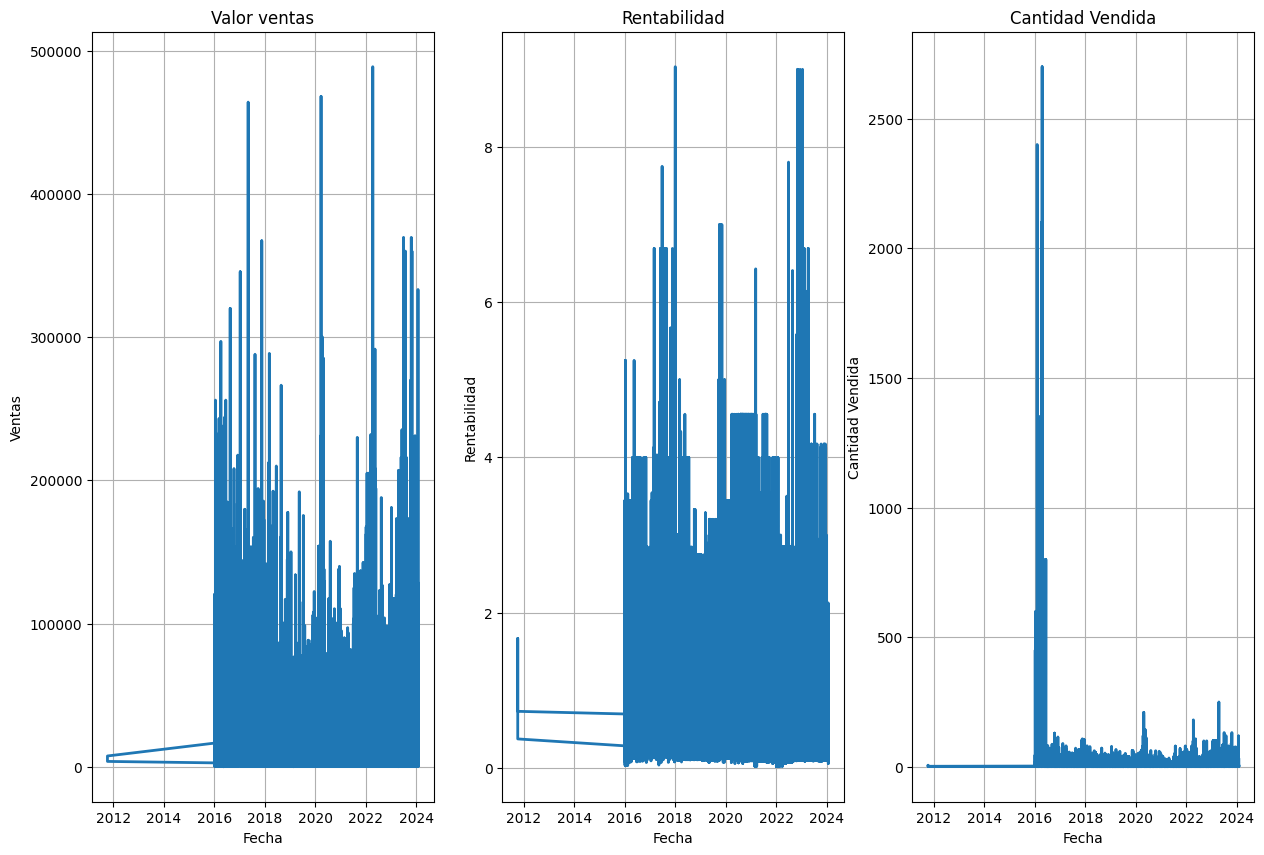

In [ ]:
##Subplot tendencia ventas y rentabilidad en función del tiempo

plt.figure(figsize=(15,10)) #Abre una figura en matplotlib
plt.subplot(1,3,1 ) # 1 fila y 2 columnas y pongo el gráfico en la posición 1. el tercer numer indica donde lo va a poner
x=df_limpio2["Fecha"]
y=df_limpio2["Valor venta"]
plt.plot(x,y,linewidth = 2.0)
plt.ylabel("Ventas")
plt.xlabel("Fecha")
plt.grid(True)
plt.title("Valor ventas")

plt.subplot(1,3,2 ) #pongo el gráfico en la posición 2
y1=df_limpio2["Rentabilidad"]
plt.plot(x,y1,linewidth = 2.0)
plt.ylabel("Rentabilidad")
plt.xlabel("Fecha")
plt.grid(True)
plt.title("Rentabilidad")

plt.subplot(1,3,3 ) #pongo el gráfico en la posición 3
y2=df_limpio2["Cantidad Vendida"]
plt.plot(x,y2,linewidth = 2.0)
plt.ylabel("Cantidad Vendida")
plt.xlabel("Fecha")
plt.grid(True)
plt.title("Cantidad Vendida")


plt.show() #cierra la línea de código de la figura


Vemos datos del 2012, que no corresponden porque la base de datos comenzó en el 2016, vamos a identificar esos datos.
En cuanto a cantidades y rentabilidad, no vemos datos negativos

In [ ]:
df_limpio2[df_limpio2["Fecha"] < '2015-12-31']

,Descripción,Sector,Fecha,Cantidad Vendida,Valor venta,Rentabilidad
108135,Pinzas,Cacharro,2011-10-09,1.0,3800.0,0.727273
108136,tornillos b27/b63,Repuestos,2011-10-09,6.0,4800.0,1.666667
108137,Hilaza 1C Color 200g,Hilazas,2011-10-09,2.0,7600.0,0.371841


Son tres registros que consideramos no representativos respecto al tamaño de la base de datos, se eliminarán
:

In [ ]:
#) #Se eliminan los tres datos
index = df_limpio2[df_limpio2["Fecha"] < '2015-12-31']
df_limpio2.drop(df_limpio2[(df_limpio2["Fecha"] < '2015-12-31')].index, inplace=True)



In [ ]:
df_limpio2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159848 entries, 0 to 159970
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Descripción       159848 non-null  object        
 1   Sector            159848 non-null  object        
 2   Fecha             159848 non-null  datetime64[ns]
 3   Cantidad Vendida  159848 non-null  float64       
 4   Valor venta       159848 non-null  float64       
 5   Rentabilidad      159848 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 8.5+ MB


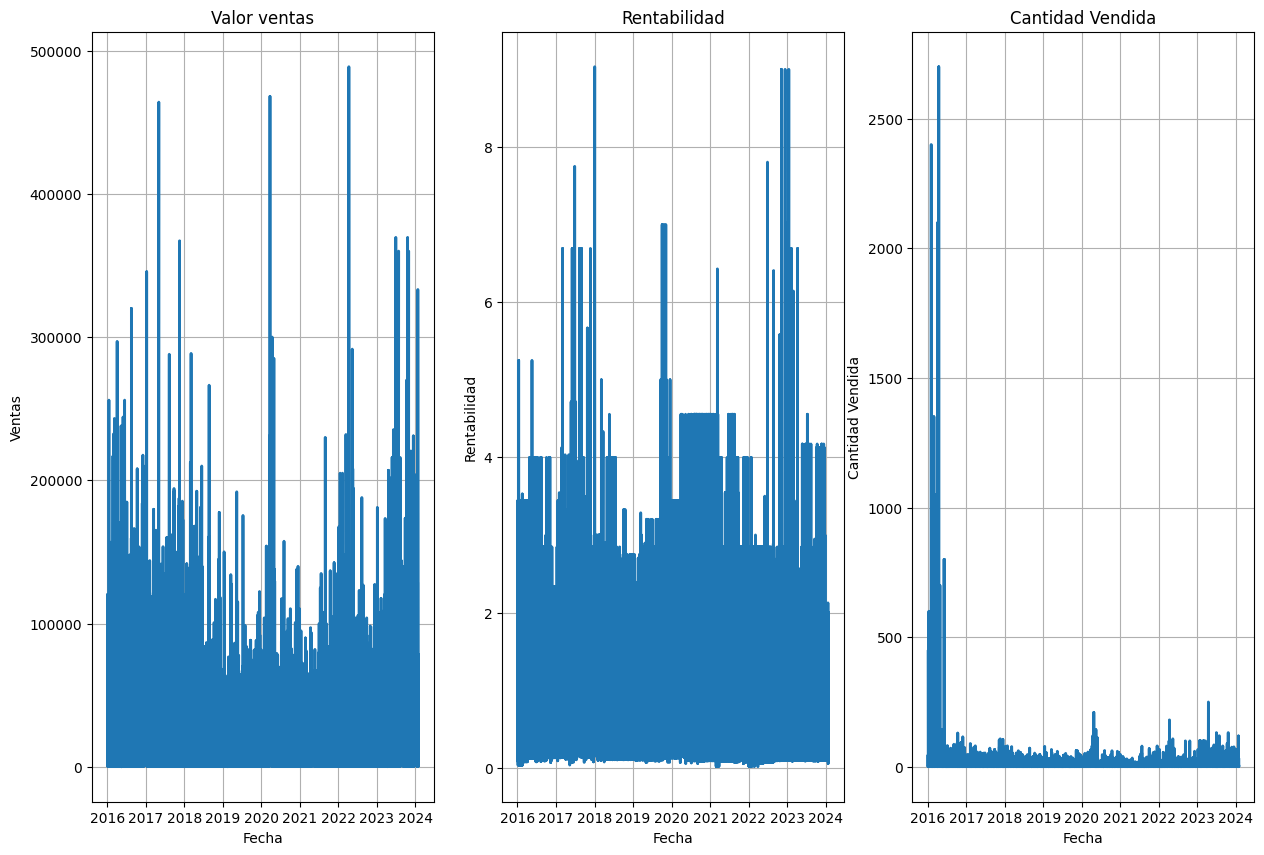

In [ ]:
##Subplot tendencia ventas y rentabilidad en función del tiempo

plt.figure(figsize=(15,10)) #Abre una figura en matplotlib
plt.subplot(1,3,1 ) # 1 fila y 2 columnas y pongo el gráfico en la posición 1. el tercer numer indica donde lo va a poner
x=df_limpio2["Fecha"]
y=df_limpio2["Valor venta"]
plt.plot(x,y,linewidth = 2.0)
plt.ylabel("Ventas")
plt.xlabel("Fecha")
plt.grid(True)
plt.title("Valor ventas")

plt.subplot(1,3,2 ) #pongo el gráfico en la posición 2
y1=df_limpio2["Rentabilidad"]
plt.plot(x,y1,linewidth = 2.0)
plt.ylabel("Rentabilidad")
plt.xlabel("Fecha")
plt.grid(True)
plt.title("Rentabilidad")

plt.subplot(1,3,3 ) #pongo el gráfico en la posición 3
y2=df_limpio2["Cantidad Vendida"]
plt.plot(x,y2,linewidth = 2.0)
plt.ylabel("Cantidad Vendida")
plt.xlabel("Fecha")
plt.grid(True)
plt.title("Cantidad Vendida")


plt.show() #cierra la línea de código de la figura

Para las variables numéricas ya no vemos datos negativos (que serían ilógicos) ni fechas por fuera del rango del dataset.
Vamos a verificar datos atípicos


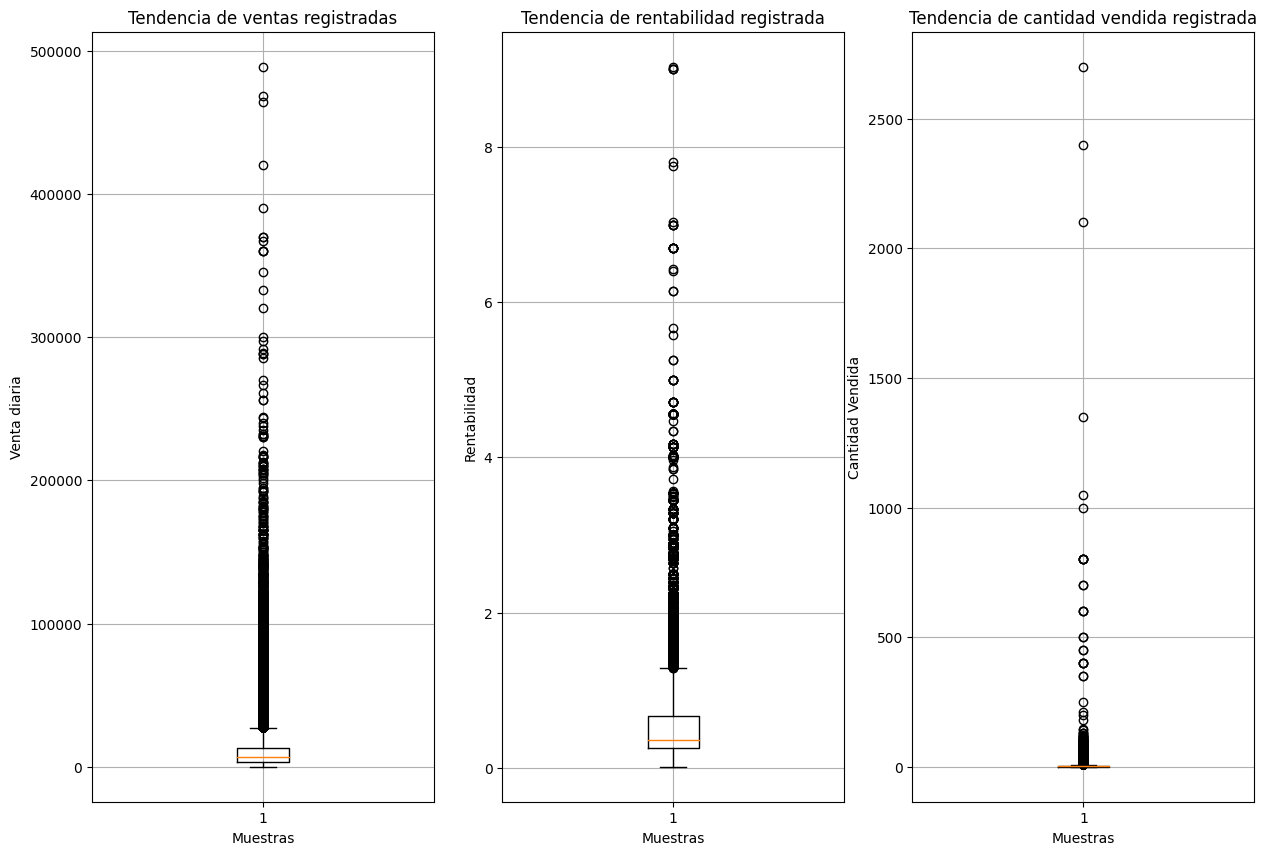

In [ ]:
##Subplot comportamiento ventas, rentabilidad y cantiidad vendida

plt.figure(figsize=(15,10)) #Abre una figura en matplotlib
plt.subplot(1,3,1 ) # 1 fila y 2 columnas y pongo el gráfico en la posición 1. el tercer numer indica donde lo va a poner
#x=df_limpio2["Fecha"]
y=df_limpio2["Valor venta"]
plt.boxplot(y)
plt.ylabel("Venta diaria")
plt.xlabel("Muestras")
plt.grid(True)
plt.title("Tendencia de ventas registradas")

plt.subplot(1,3,2 ) #pongo el gráfico en la posición 2
y1=df_limpio2["Rentabilidad"]
plt.boxplot(y1)
plt.ylabel("Rentabilidad")
plt.xlabel("Muestras")
plt.grid(True)
plt.title("Tendencia de rentabilidad registrada")

plt.subplot(1,3,3 ) #pongo el gráfico en la posición 3
y2=df_limpio2["Cantidad Vendida"]
plt.boxplot(y2)
plt.ylabel("Cantidad Vendida")
plt.xlabel("Muestras")
plt.grid(True)
plt.title("Tendencia de cantidad vendida registrada")
plt.show() #cierra la línea de código de la figura

La tendencia de ventas registradas y rentabilidad son viables, sin embargo, en la cantidad vendida se ven datos atípicos (>1000), los vamos a revisar


In [ ]:
df_limpio2[df_limpio2["Cantidad Vendida"] > 500].value_counts().sum()

16

In [ ]:
df_limpio2[df_limpio2["Cantidad Vendida"] > 500]

,Descripción,Sector,Fecha,Cantidad Vendida,Valor venta,Rentabilidad
131,Hilaza Por Kilo color (gramos) 1 Cabo,Hilazas,2016-01-12,600.0,8400.0,0.272727
678,Hilaza Por Kilo color (gramos) 1 Cabo,Hilazas,2016-02-18,600.0,8400.0,0.272727
858,Hilaza Por Kilo color (gramos) 1 Cabo,Hilazas,2016-02-25,700.0,9800.0,0.272727
953,Hilaza Por Kilo color (gramos) 1 Cabo,Hilazas,2016-02-29,1350.0,18900.0,0.272727
999,Hilaza Por Kilo color (gramos) 1 Cabo,Hilazas,2016-03-01,800.0,11200.0,0.272727
1176,Hilaza Por Kilo color (gramos) 1 Cabo,Hilazas,2016-03-09,1050.0,14700.0,0.272727
1635,Hilaza Por Kilo color (gramos) 1 Cabo,Hilazas,2016-02-03,2400.0,33600.0,0.272727
1764,Hilaza Por Kilo color (gramos) 1 Cabo,Hilazas,2016-02-08,800.0,11200.0,0.272727
1936,Hilaza Por Kilo color (gramos) 1 Cabo,Hilazas,2016-02-15,800.0,11200.0,0.272727
2081,Hilaza Por Kilo color (gramos) 1 Cabo,Hilazas,2016-03-31,1000.0,14000.0,0.272727


Se confirma que los datos "atípicos" en la varible cantidad vendida son reales y corresponden productos que se vendieron en un tiempo determinado.
Hasta este momento tenemos las variables numéricas con datos confiables


In [ ]:
#guardamos el dataframe

df_limpio2.to_excel('SegundaDepuración.xlsx', sheet_name='11-marzo')

In [ ]:
df_limpio3= pd.read_excel(("/content/SegundaDepuración.xlsx"))

In [ ]:
df_limpio3=df_limpio2.copy()

In [ ]:
df_limpio3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159826 entries, 0 to 159970
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Descripción       159826 non-null  object        
 1   Sector            159826 non-null  object        
 2   Fecha             159826 non-null  datetime64[ns]
 3   Cantidad Vendida  159826 non-null  float64       
 4   Valor venta       159826 non-null  float64       
 5   Rentabilidad      159826 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 8.5+ MB


##3. Limpieza de variables categóricas.

***Unidad***: Columna eliminada porque hace referencia a la unidad de medida y no se considera información útil para evaluar rentabilidad.

***Descripción y sector(categoria):*** se corrige la asignación de sectores para registros erróneos y se eliminan 10 registros de productos que no corresponden a algún sector (muestras vendidas)


Ya se conoce el comportamiento de las ventas, ahora se hará limpieza de las variables categóricas

In [ ]:
df_limpio3.info()

NameError: name 'df_limpio3' is not defined

In [ ]:
df_limpio3["Fecha"]

In [ ]:
df_limpio3['Sector'].unique()

In [ ]:
df_limpio3['Sector'] = df_limpio3['Sector'].str.lower() # pasar a letra minúscula


In [ ]:
df_limpio3['Sector'] =df_limpio3['Sector'].str.strip() #quitar espacios

In [ ]:
df_limpio3['Sector'].unique()

En la característica **Sector** se encuentra lo siguiente:

categorias incorrectas:

-carretel es un repuesto

-hilzas = hilazas

-repustos,repuestos. y repuestor = repuestos

agujss = agujas

cono = hilos

CONO NO DEBERÍA SER UNA CATEGORÍA, VEREMOS QUE DATOS TIENE "CONO"

In [ ]:
df_limpio3[df_limpio3['Sector']=='cono']

In [ ]:
# Hilo premier corresponde a la categoria 'hilos'

In [ ]:
#Hacemos una copia del df, antes de modificarlo

df_limpio4=df_limpio3.copy()

In [ ]:

df_limpio4['Sector'] =df_limpio4['Sector'].str.replace("hilzas","hilazas")
df_limpio4['Sector'] =df_limpio4['Sector'].str.replace("repustos","repuestos")
df_limpio4['Sector'] =df_limpio4['Sector'].str.replace("repuestos.","repuestos")
df_limpio4['Sector'] =df_limpio4['Sector'].str.replace("repuestor","repuestos")
df_limpio4['Sector'] =df_limpio4['Sector'].str.replace("agujss","agujas")
df_limpio4['Sector'] =df_limpio4['Sector'].str.replace("carretel","repuestos")
df_limpio4['Sector'] =df_limpio4['Sector'].str.replace("cono","hilos")


In [ ]:
df_limpio4['Sector'].unique() # En este momento ya tenemos la columna categórica "Sector" depurada.

In [ ]:
df_limpio4[df_limpio4['Sector']=='hilo'] #El sector hilo correponde a una muestra partícular de hilos que no se tendrá en cuenta para el análisis

In [ ]:
df_limpio4[df_limpio4['Sector']=='hilo'].value_counts().sum() #se eliminarán estos 10 registros

In [ ]:
index1 = df_limpio4[df_limpio4["Sector"] == 'hilo']
df_limpio4.drop(df_limpio4[(df_limpio4["Sector"] == 'hilo')].index, inplace=True)


In [ ]:
df_limpio4['Sector'].unique() # En este momento ya tenemos la columna categórica "Sector" depurada y sin el sector hilo

In [ ]:
 #Se hará la depuración por descripción
df_limpio4['Descripción']  = df_limpio4['Descripción'].str.lower() # pasar a letra minúscula
df_limpio4['Descripción']  = df_limpio4['Descripción'].str.strip() # pasar a letra minúscula

In [ ]:
df_limpio4['Descripción'].unique()


Esta columna tiene una gran cantidad de información y tipos de productos diferentes. Por lo tanto, Se revisará que las descripciones correspondan con el "sector" para así desglosar el problema de manera mas sencilla

In [ ]:
df_limpio4[df_limpio4['Sector']=="hilazas"]['Descripción'].unique()


Todas las descripciones incluidas en el sector hilazas son correctas.

In [ ]:
df_limpio4[df_limpio4['Sector']=='hilazas nylon']['Descripción'].unique()

Todas las descripciones incluidas en el sector hilazas nylon son correctas.

In [ ]:
df_limpio4[df_limpio4['Sector']=='hilos']['Descripción'].unique()

Todas las descripciones incluidas en el sector hilos nylon son correctas.

In [ ]:
df_limpio4[df_limpio4['Sector']=='hilos de bordar']['Descripción'].unique()

Todas las descripciones incluidas en el sector hilos de bordar son correctas.

In [ ]:
df_limpio4[df_limpio4['Sector']=='repuestos']['Descripción'].unique()


Todas las descripciones incluidas en el sector repuestos son correctas.

In [ ]:
df_limpio4[df_limpio4['Sector']=='agujas']['Descripción'].unique()


Todas las descripciones incluidas en el sector agujas son correctas.

In [ ]:
df_limpio4[df_limpio4['Sector']=='cierres']['Descripción'].unique()


In [ ]:
df_limpio4[df_limpio4['Sector']=='cacharro']['Descripción'].unique()


Todas las descripciones incluidas en el sector cacharro son correctas.

In [ ]:
df_limpio4[df_limpio4['Sector']=='aceites']['Descripción'].unique()

In [ ]:
df_limpio4[df_limpio4['Sector']=='resortes']['Descripción'].unique()


Todas las descripciones incluidas en el sector resortes son correctas.

In [ ]:
df_limpio4[df_limpio4['Sector']=='tijeras']['Descripción'].unique()


Todas las descripciones incluidas en el sector resortes son correctas.

In [ ]:
df_limpio4.info()

In [ ]:
## se guarda una copia en excel del dataframe depurado
df_limpio4.to_excel('DepuracionFinal.xlsx', sheet_name='14-marzo')

In [ ]:
df_limpio4.info()

In [ ]:
df_limpio4

#4. Análisis de información y gráficos

Se hará un resumen del comportamiento de las ventas del almacén usando las variables numéricas: "Rentabilidad" y "valor venta" en función del tiempo



In [7]:
#leer la base de datos depurada
df_limpio4 = pd.read_excel("/content/DepuracionFinal.xlsx")


In [ ]:
df_limpio4

In [ ]:
#guardamos la base de datos limpia como csv

# Guardar el DataFrame como CSV
df_limpio4.to_csv("BDlimpiaCSV.csv")

In [8]:
##"Se crean nuevas columnas de mes y año para agrupar los datos por estas variables y poder visualizar
df_limpio4['mes'] = df_limpio4['Fecha'].dt.month
df_limpio4['año'] = df_limpio4['Fecha'].dt.year

Se crea función para calcular promedio ponderado y así hacer uso de ella con apply y groupby para agrupar el promedio ponderado de la rentabilidad por año y mes, para entender cuáles son los meses de mejor venta y el año.

In [9]:
def promedio_ponderado(group):
    suma_productos = (group['Rentabilidad'] * group['Valor venta']).sum()
    suma_pesos = group['Valor venta'].sum()
    return suma_productos / suma_pesos

# Agrupar por fecha y calcular el promedio ponderado para cada grupo
prom_pond_por_mes = df_limpio4.groupby(['mes']).apply(promedio_ponderado)
prom_pond_por_año = df_limpio4.groupby(['año']).apply(promedio_ponderado)
print(prom_pond_por_mes)
print(prom_pond_por_año)

mes
1     0.393741
2     0.382119
3     0.371714
4     0.385054
5     0.389074
6     0.395590
7     0.399358
8     0.397230
9     0.392071
10    0.389589
11    0.398952
12    0.397953
dtype: float64
año
2016    0.411771
2017    0.397804
2018    0.381032
2019    0.360141
2020    0.391126
2021    0.401967
2022    0.390310
2023    0.396459
2024    0.391267
dtype: float64


Text(0.5, 1.0, 'Rentabilidad promedio por año')

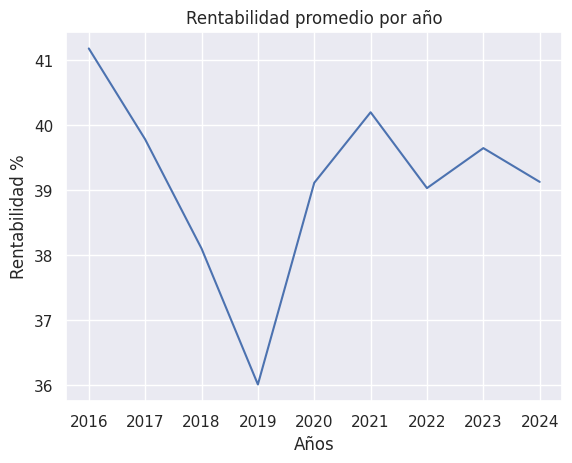

In [19]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=prom_pond_por_año.index, y=prom_pond_por_año.values*100 )
plt.xlabel('Años')
plt.ylabel('Rentabilidad %')
plt.title('Rentabilidad promedio por año')


El año con mejor rentabilidad fue el 2016. Entre el 2019 y el 2021 de observa una caida y repunte de la rentabilidad que probablemente este asociado a la pandemia.

Text(0, 0.5, 'Rentabilidad %')

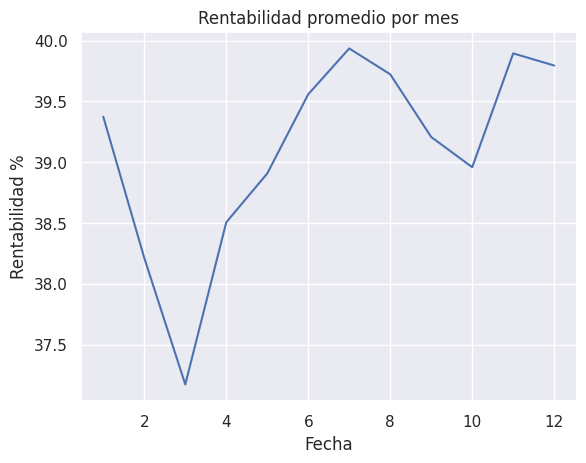

In [20]:
sns.set_theme(style="darkgrid")
plt.figure()
sns.lineplot(x=prom_pond_por_mes.index,y=prom_pond_por_mes.values*100)
plt.title('Rentabilidad promedio por mes')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad %')

Se puede observar que los meses de mayor rentabilidad son  noviembre y diciembre lo cual es lo esperado ya que coincide con la época de mayor comercio de ropa y textil, también se tiene muy buena rentabilidad en julio, poiblemente es un buen mes en la venta de textiles por el pago  de las primas de mitad de año.

In [21]:
# Ventas anuales
Ventas_por_año = df_limpio4[df_limpio4['año']<2024].groupby(['año'])['Valor venta'].sum()
print(Ventas_por_año)

año
2016    172212850
2017    165204360
2018    183676600
2019    192741200
2020    216570810
2021    229341600
2022    276257940
2023    266770323
Name: Valor venta, dtype: int64


Text(0, 0.5, 'Ventas (millones COP)')

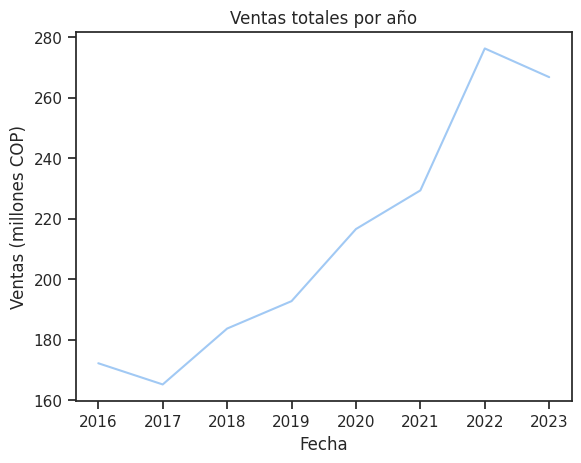

In [22]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure()
sns.lineplot(x=Ventas_por_año.index,y=Ventas_por_año.values/1000000)
plt.title('Ventas totales por año')
plt.xlabel('Fecha')
plt.ylabel('Ventas (millones COP)')


Se observa que el negocio ha tenido un crecimiento constante en las ventas año tras año, lo cual es un buen indicio y también la oportunidad implementar mejoras que permitan continuar con este aumento en ventas


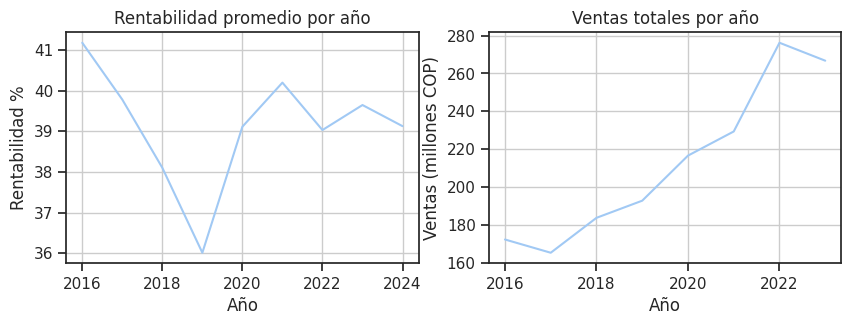

In [23]:
plt.figure(figsize=(10,3)) #Abre una figura en matplotlib
sns.set_theme(style="ticks", palette="pastel")
plt.subplot(1,2,1 )
sns.lineplot(x=prom_pond_por_año.index,y=prom_pond_por_año.values*100)
plt.title('Rentabilidad promedio por año')
plt.xlabel('Año')
plt.ylabel('Rentabilidad %')
plt.grid(True)

plt.subplot(1,2,2 )
sns.lineplot(x=Ventas_por_año.index,y=Ventas_por_año.values/1000000)
plt.title('Ventas totales por año')
plt.xlabel('Año')
plt.ylabel('Ventas (millones COP)')
plt.grid(True)
plt.show() #cierra la línea de código de la figura

Con la base de datos depurada se evaluarán las ventas del ultimo año (2023) para conocer el aporte de cada sector en terminos de $  y de rentabilidad

In [10]:
Ventas_2023 = df_limpio4[df_limpio4['año']==2023] #Se genera un dataset con ventas del 2023
Ventas_2023


,Descripción,Sector,Fecha,Cantidad Vendida,Valor venta,Rentabilidad,mes,año
139107,hilo mh 120/2000,hilos,2023-01-02,3.0,8100,0.227273,1,2023
139108,tiza 2 manos,cacharro,2023-01-02,1.0,1400,1.000000,1,2023
139109,aguja princes victoria.,agujas,2023-01-02,1.0,2700,0.588235,1,2023
139110,1/4 galón,aceites,2023-01-02,1.0,21000,0.484099,1,2023
139111,aguja plana unidad,agujas,2023-01-02,2.0,2000,0.526718,1,2023
...,...,...,...,...,...,...,...,...
158772,metro mexicano,cacharro,2023-12-29,1.0,3500,1.333333,12,2023
158773,"resorte 05 07 1 1,5 por metros",resortes,2023-12-29,6.0,4200,1.000000,12,2023
158774,hilo venus 120/2000,hilos,2023-12-29,4.0,12000,0.363636,12,2023
158775,resorte 2 a 5 cm,resortes,2023-12-29,0.5,10400,0.260606,12,2023


In [15]:
sectores= Ventas_2023['Sector'].unique()
sectores

array(['hilos', 'cacharro', 'agujas', 'aceites', 'repuestos', 'hilazas',
       'hilazas nylon', 'resortes', 'cierres', 'tijeras'], dtype=object)

In [24]:
#Se suman las ventas por sector en el año 2023
ventas =np.empty((10, 1))

for i in range(len(sectores)):

  ventas[i]=Ventas_2023[Ventas_2023['Sector']==sectores[i]]['Valor venta'].sum()




In [ ]:
ventas

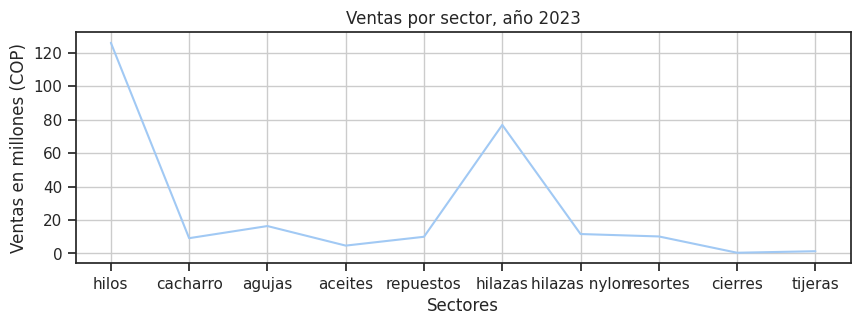

In [25]:
plt.figure(figsize=(10,3))
plt.plot(sectores,ventas/1000000)
plt.title('Ventas por sector, año 2023')
plt.xlabel('Sectores')
plt.ylabel('Ventas en millones (COP)')
plt.grid(True)

Los hilos y las hilazas son los sectores que generan más flujo de caja.

In [27]:
#Se promedia la rentabilidad por sector en el año 2023
rent =np.empty((10, 1))

for i in range(len(sectores)):

  rent[i]=Ventas_2023[Ventas_2023['Sector']==sectores[i]]['Rentabilidad'].mean()



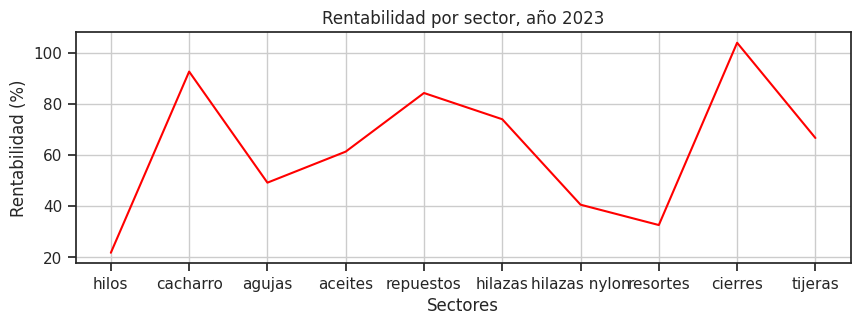

In [28]:
plt.figure(figsize=(10,3))
plt.plot(sectores,rent*100,color="red")
plt.title('Rentabilidad por sector, año 2023')
plt.xlabel('Sectores')
plt.ylabel('Rentabilidad (%)')

plt.grid(True)

La rentabilidad más baja la da el sector de más ventas (hilos), por su parte, las hilazas que ocupan el segúndo lugar en ventas aportan una buena rentabilidad al negocio.


Ahora se procede a hacer el mismo ejercicio para el año 2016 que fue el año de mejor rentabilidad hasta el momento, para así sacar conclusiones de ese año e intentar replicarlas en los siguientes años.

In [29]:
Ventas_2016 = df_limpio4[df_limpio4['año']==2016] #Se genera un dataset con ventas del 2016


In [30]:
#Se suman las ventas por sector en el año 2016
ventas_2 =np.empty((11, 1))
sectores_2= Ventas_2016['Sector'].unique()
print(sectores_2)

for i in range(len(sectores)):

  ventas_2[i]=Ventas_2016[Ventas_2016['Sector']==sectores_2[i]]['Valor venta'].sum()




['hilazas' 'hilazas nylon' 'hilos' 'hilos de bordar' 'repuestos' 'agujas'
 'cierres' 'cacharro' 'aceites' 'resortes' 'tijeras']


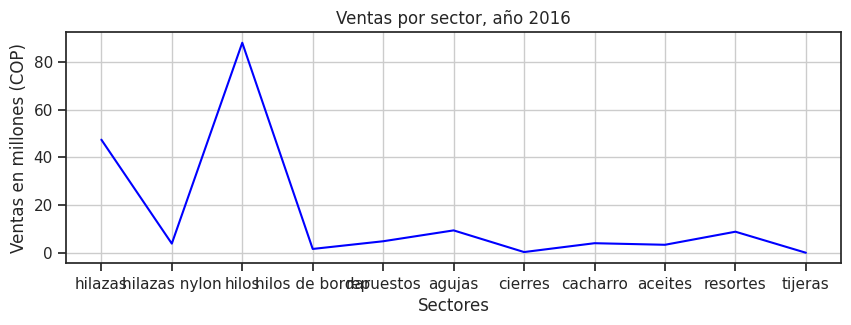

In [31]:
plt.figure(figsize=(10,3))
plt.plot(sectores_2,ventas_2/1000000, color="blue")
plt.title('Ventas por sector, año 2016')
plt.xlabel('Sectores')
plt.ylabel('Ventas en millones (COP)')
plt.grid(True)

In [32]:
#Se promedia la rentabilidad por sector en el año 2016
rent_2 =np.empty((11, 1))

for i in range(len(sectores_2)):

  rent_2[i]=Ventas_2016[Ventas_2016['Sector']==sectores_2[i]]['Rentabilidad'].mean()



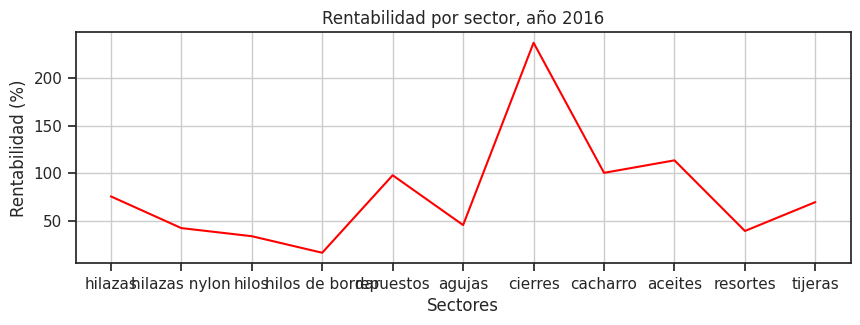

In [33]:
plt.figure(figsize=(10,3))
plt.plot(sectores_2,rent_2*100, color="red")
plt.title('Rentabilidad por sector, año 2016')
plt.xlabel('Sectores')
plt.ylabel('Rentabilidad (%)')
plt.grid(True)

Los cuatro últimos gráficos se agrupan para sacar conclusiones entre el año de mejor rentabilidad (2016) y el último año 2023)


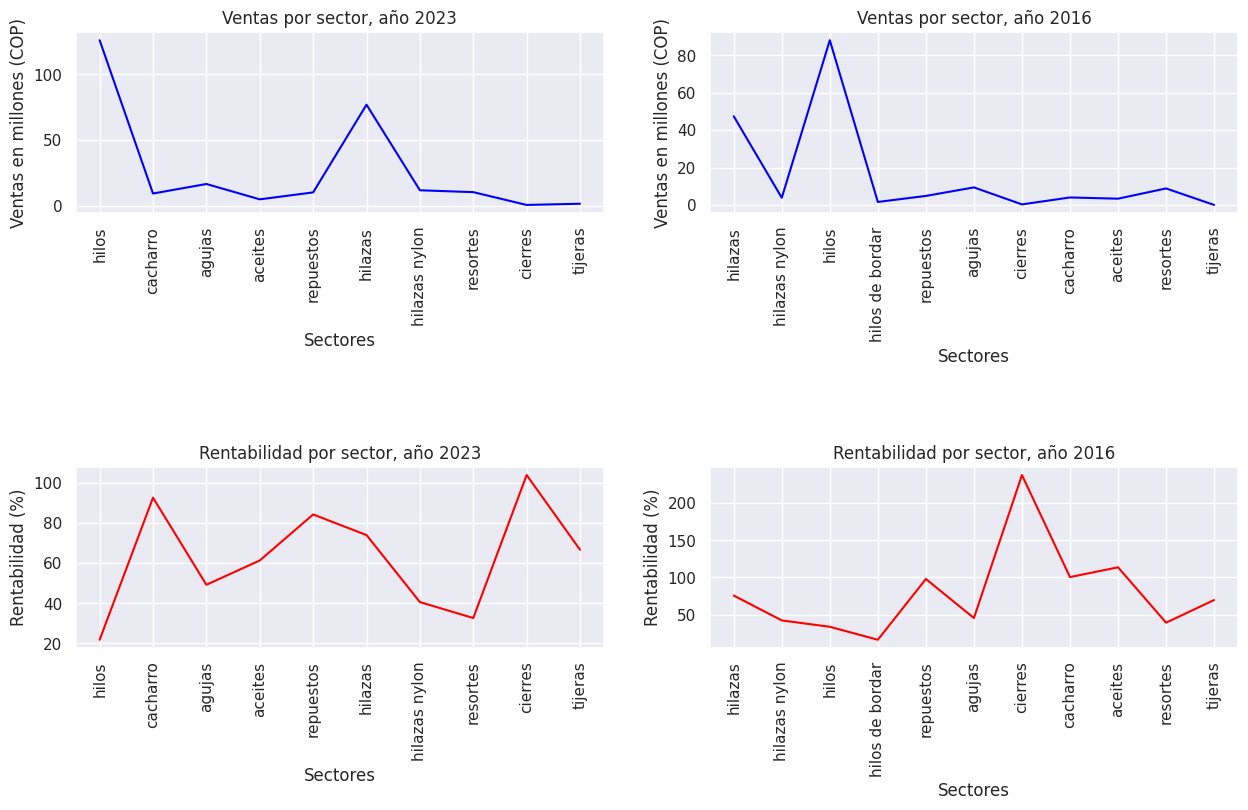

In [34]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
plt.subplot(3,2,1 )
sns.lineplot(x = (sectores.reshape(-1)), y = ((ventas/1000000).reshape(-1)),color="blue")
plt.title('Ventas por sector, año 2023')
plt.xlabel('Sectores')
plt.ylabel('Ventas en millones (COP)')
plt.xticks(rotation=90)

plt.subplot(3,2,2 )
sns.lineplot(x=((sectores_2).reshape(-1)),y=((ventas_2/1000000).reshape(-1)), color="blue")
plt.title('Ventas por sector, año 2016')
plt.xlabel('Sectores')
plt.ylabel('Ventas en millones (COP)')
plt.xticks(rotation=90)

plt.subplot(3,2,5)
sns.lineplot(x = (sectores.reshape(-1)),y=((rent*100).reshape(-1)),color="red")
plt.title('Rentabilidad por sector, año 2023')
plt.xlabel('Sectores')
plt.ylabel('Rentabilidad (%)')
plt.xticks(rotation=90)

plt.subplot(3,2,6)
sns.lineplot(x= ((sectores_2).reshape(-1)),y= ((rent_2*100).reshape(-1)), color="red")
plt.title('Rentabilidad por sector, año 2016')
plt.xlabel('Sectores')
plt.ylabel('Rentabilidad (%)')
plt.xticks(rotation=90)

plt.show() #cierra la línea de código de la figura

Para los años 2016 (el más rentable) y el anterior (2023), vemos lo siguiente:

*   El patrón de flujo de ventas se mantiene: Hilos en el primer lugar e hilazas en el segundo.

*   La rentabilidad de los hilos similar en estos  años, la hilaza presenta mejor rentabilidad en el 2023.

*   En el 2016 los productos complementarios presentaron mejor rentabilidad que en el 2023: aceites, cierres, repuestos, resortes. Esto indica que una manera de incrementar rentabilidad es mejorar la oferta en estos sectores

Text(0.5, 1.0, 'Ventas por sector, año 2023')

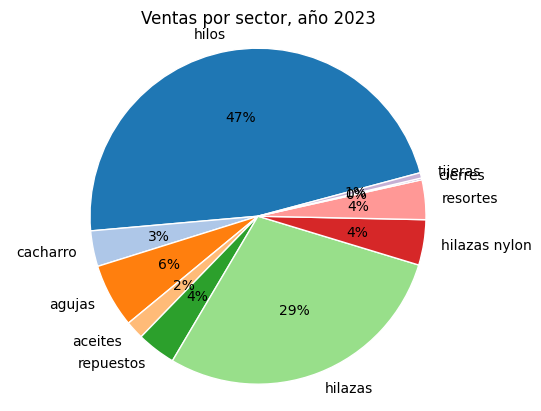

In [18]:
## Grafico de pastel de las ventas en el 2023. Otra manera de ver los productos predominantes en el flujo de caja
colores = sns.color_palette('tab20')[0:11]
plt.pie(((ventas).reshape(-1)), labels= ((sectores).reshape(-1)),
        colors=colores,
        autopct='%.0f%%',
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
        startangle=15,
        rotatelabels = False,
        textprops={'fontsize': 10},
        radius=10
        )
plt.axis('equal')
plt.title('Ventas por sector, año 2023')

El gráfico de pastel indica que los hilos, las hilazas y las agujas concentran 82% del flujo de caja

#5. Conclusiones

###1. En los gráficos se pudo observar que el producto que más se vende son los hilos es el que menor rentabilidad le deja a la empresa, y que productos de alta rentabilidad como son los cierres y el cacharro no se les da mucha importancia por sus bajas ventas pero claramente son la clase de productos que hay que potenciar para tener mejores dividendos.

###2. Los productos estrella de la empresa son las hilazas, pues tienen un buen volumen de ventas y una buena rentabilidad, por lo cual sería idóneo invertir más en ese sector.

###3. El valor de las ventas ha aumentado año a año desde 2016 lo que da buenas señales en cuanto al crecimiento del negocio, por lo cual la prioridad debe estar en el incremento de ganancias potenciando a los productos que mayor rentabilidad dejan.

###4. El año de mayor rentabilidad hasta el momento fue el 2016, seguido del 2021, en el cual se vuelve a tener como producto con mayor rentabilidad a los cierres, por lo cual se debe a apuntar a mejorar el portafolio en este sector, los hilos siguen siendo el producto de mayor venta, lo que indica que a pesar de que su rentabilidad no es buena es un producto que no debe faltar.

###5 Los productos complemetarios tienen mejor rentabilidad que los hilos, se propone incrementar su oferta para contribuir en mayor medida a mejorar la retabilidad neta.